Constrained Utility Maximization
====================

This example solves a demand problem with Cobb-Douglas utility 


$$U(x_1,x_2) = x_1^\alpha x_2^\beta$$

and budget constraint

$$M = x_1p_1+x_2p_2$$

Solving for $x_2$ to obtain the budget constraint in terms of $M$ and $x_1$ gives

$$x_2 = \frac{M}{p_2} - x_1\frac{p_1}{p_2}$$

Solving for an isoquant in terms of $U$ and $x_1$

$$x_2 = \left( \frac{U}{x_1^\alpha}\right)^\frac{1}{\beta}$$


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

In [2]:
def utility(x1, alpha, x2, beta):
    return (x1**alpha)*(x2**beta)

def isoquant(x1, alpha, beta, u):
    return (u/(x1**alpha))**(1/beta)

def budgetconst(m, p1, p2, x1):
    return (m/p2)-(p1/p2)*x1

## Finding Optimal Point

Using a Lagrangian to find the optimal point

$$L(x_1,x_2) = x_1^\alpha x_2^\beta + \lambda(M - x_1p_1 - x_2p_2)$$

Differentiate with respect to $x_1$ and $x_2$

$$ \frac{\partial L}{\partial x_1} = \alpha x_1^{\alpha-1} x_2^\beta - \lambda{p_1} $$
$$ \frac{\partial L}{\partial x_2} = \beta x_2^{\beta-1} x_1^\alpha - \lambda{p_2} $$

Setting both first order conditions $=0$ and substitute for $\lambda$ and solving for $x_1$ in terms of $x_2$

$$ x_1 = \frac{\alpha p_2}{\beta p_1}x_2$$

Substitute into the budget constraint to solve for $x_2$

$$x_2 = \frac{M}{\frac{\alpha}{\beta}p_2}  + p_2$$

Now we can solve for $x_2$ using parameters $\alpha$, $\beta$, and price.

In [3]:
#-Find Optimal Point Function-#
def find_optimal(p1, p2, alpha, beta, m=1):
    x2 = m / ((alpha / beta) * (p2) + p2)
    x1 = (alpha / beta) * (p2 / p1) * x2
    u = utility(x1, alpha, x2, beta)
    return x1, x2, u

In [4]:
x1, x2, u = find_optimal(1, 2, 0.5, 0.5, m=1)

In [5]:
x1

0.5

In [6]:
x2

0.25

In [7]:
u

0.3535533905932738

## Plot


In [8]:
# Set Parameters
alpha = 0.5
beta = 0.5
p1 = 1
p2 = 1
m = 10

### Get Data for Plot

In [9]:
# Find Optimal Points
x1i, x2i, u = find_optimal(p1, p2, alpha, beta, m)

# x-axis range
x1 = np.arange(0.1,10,0.1)

# IsoQuant
x2a = isoquant(x1, alpha, beta, u)

# Budget Constraint
x2b = budgetconst(m,p1,p2,x1)

In [10]:
x1

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

### Construct a Plot

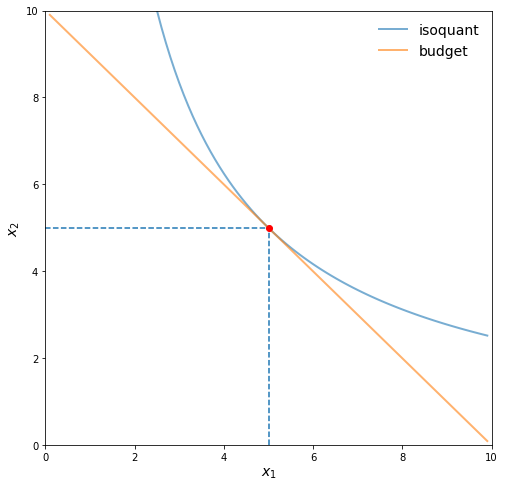

In [11]:
# Setup a Figure
fig, ax = plt.subplots(figsize=(8,8))

# Add the Isoquant Plot (x2a given x1)
ax.plot(x1, x2a, lw=2, alpha=0.6, label='isoquant')

# Add the Budget Constraint (x2b given x1)
ax.plot(x1, x2b, lw=2, alpha=0.6, label='budget')

# Add vertical and horizontal lines for optimal solution
ax.vlines(x1i, 0, x2i, linestyles="dashed")
ax.hlines(x2i, 0, x1i, linestyles="dashed")

# Plot optimal allocation intersection ('or' = red circle)
ax.plot(x1i, x2i, 'or')

# Add Labels
ax.set_xlabel(r'$x_{1}$', fontsize=14)
ax.set_xlim(0, 10)
ax.set_ylabel('$x_{2}$', fontsize=14)
ax.set_ylim(0, 10)

# Add a Legend
ax.legend(loc='upper right', frameon=False, fontsize=14)

# Plot the Figure
plt.show()

## Making the Plot Interactive

**Step 1:** Wrap the code into a function

In [12]:
def plot_figure(alpha, beta, p1, p2, m):
    x1i, x2i, u = find_optimal(p1, p2, alpha, beta, m)
    x1 = np.arange(0.1,10,0.1)
    x2a = isoquant(x1,alpha,beta,u)
    x2b = budgetconst(m,p1,p2,x1)
    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(x1, x2a, lw=2, alpha=0.6, label='isoquant')
    ax.plot(x1, x2b, lw=2, alpha=0.6, label='budget')
    ax.vlines(x1i,0,x2i, linestyles="dashed")
    ax.hlines(x2i,0,x1i, linestyles="dashed")
    ax.plot(x1i,x2i,'or')
    ax.set_xlabel(r'$x_{1}$', fontsize=14)
    ax.set_xlim(0, 10)
    ax.set_ylabel('$x_{2}$', fontsize=14)
    ax.set_ylim(0, 10)
    ax.legend(loc='upper right', frameon=False, fontsize=14)
    plt.show()

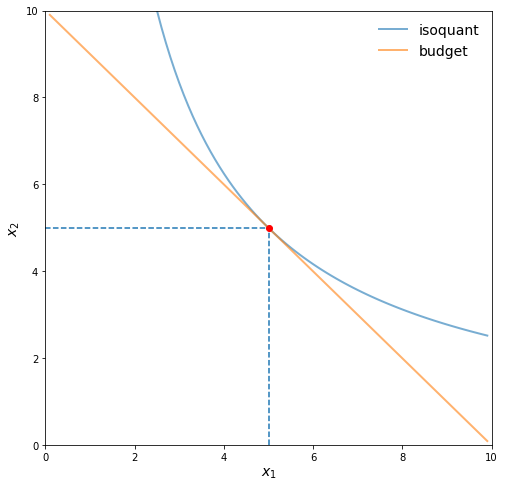

In [13]:
plot_figure(alpha, beta, p1, p2, m)

In [14]:
from ipywidgets import interact

@interact(alpha=(0.01, 0.99, 0.01), beta=(0.01, 0.99, 0.01), p1=(1, 4, 0.5), p2=(1, 4, 0.5), m=(10, 30, 1))
def plot_figure(alpha, beta, p1 ,p2 ,m):
    x1i, x2i, u = find_optimal(p1, p2, alpha, beta, m)
    #-Figure-#
    x1 = np.arange(0.1, 10, 0.1)
    x2a = isoquant(x1, alpha, beta, u)
    x2b = budgetconst(m, p1, p2, x1)
    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(x1, x2a, lw=2, alpha=0.6, label='isoquant')
    ax.plot(x1, x2b, lw=2, alpha=0.6, label='budget')
    ax.vlines(x1i, 0, x2i, linestyles="dashed")
    ax.hlines(x2i, 0, x1i, linestyles="dashed")
    ax.plot(x1i, x2i, 'or')
    ax.set_xlabel(r'$x_{1}$', fontsize=14)
    ax.set_xlim(0, 10)
    ax.set_ylabel('$x_{2}$', fontsize=14)
    ax.set_ylim(0, 10)
    ax.legend(loc='upper right', frameon=False, fontsize=14)
    plt.show()

interactive(children=(FloatSlider(value=0.5, description='alpha', max=0.99, min=0.01, step=0.01), FloatSlider(…